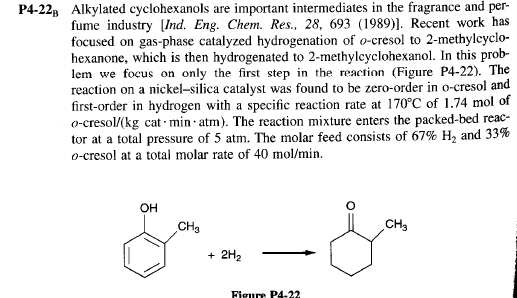

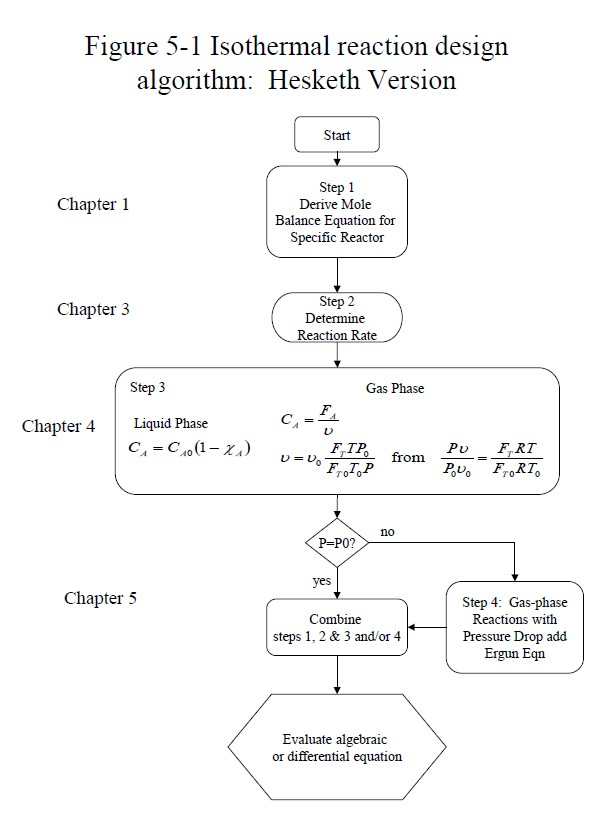

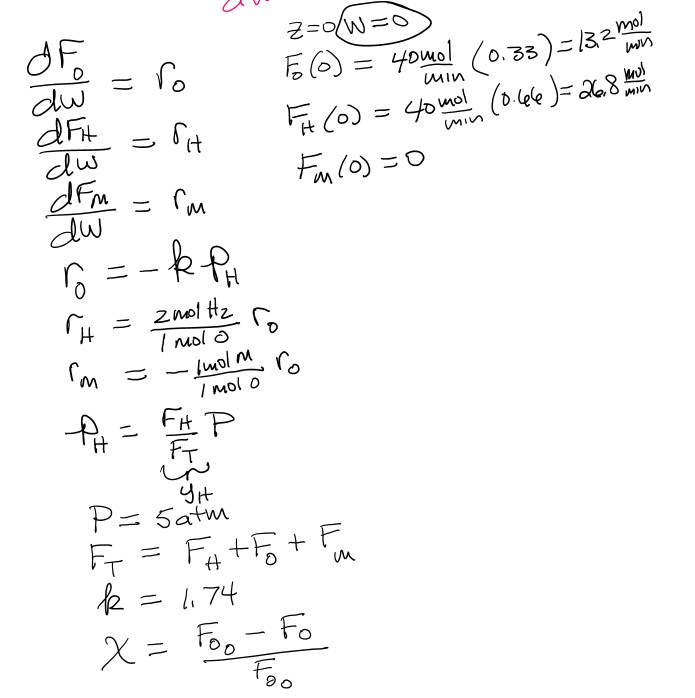

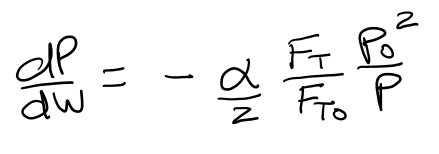

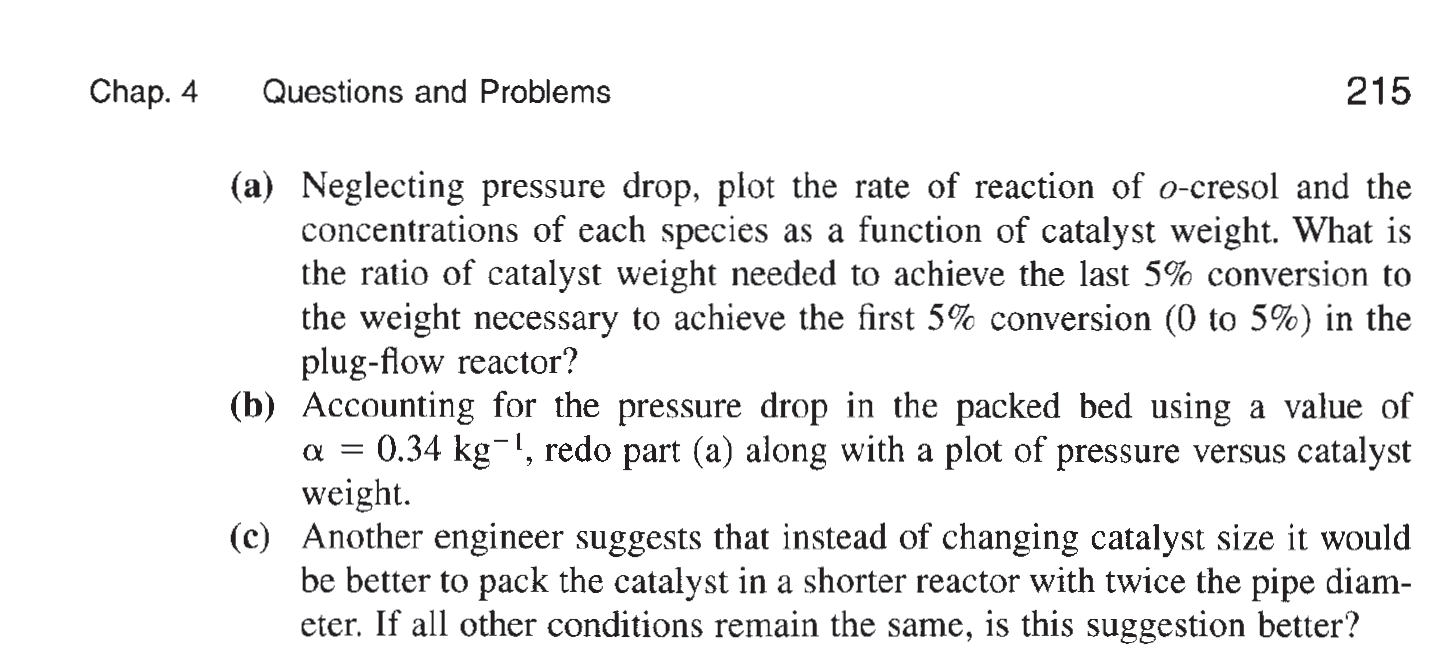

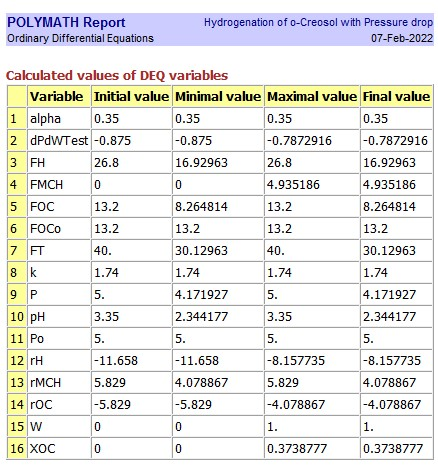

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import math
import matplotlib.pyplot as plt

In [2]:
#This function is to return the values of the 4 derivatives C&S4.3b and 5.3a
def  ODEfun(W,Yfuncvec):#fun(t,y) and return dy/dt
    FOC = Yfuncvec[0]
    FH = Yfuncvec[1]
    FMCH = Yfuncvec[2]
    P = Yfuncvec[3]
    
    k=1.74 # mol/kgcat/min/atm
    FT0 = 40 #mol/min 
    P0=5
    FOC0=FT0*.33
    FH0=FT0*.67
    FT=FOC+FH+FMCH
    pH=P*FH/FT
    rOC=-k*pH
    alpha = 0.35
    
    rH=2*rOC
    rMCH=-rOC
    XOC=(FOC0-FOC)/FOC0

    dFOCdW = rOC #Differential mass balance on acetone 

    dFHdW = rH #Differential mass balance on ketene

    dFMCHdW = rMCH #Differential mass balance on methane 

    dPdW = -alpha/2*P0**2/P*(1-2/3*XOC)#-alpha/2*FT/FT0*P0**2/P
    
    dYfuncvecdW = [dFOCdW, dFHdW, dFMCHdW, dPdW] 
    return dYfuncvecdW 


In [3]:
#This cell is to test the equations to see if they agree with hand calculations
FT0 = 40 #mol/min 
P0=5
FOC0=FT0*.33
FH0=FT0*.67

tspan = (0,5) # Range for the independent variable 
F0 = [FOC0, FH0, 0, P0]


FOC = F0[0]
FH = F0[1]
FMCH = F0[2]
P = F0[3]
k=1.74 # mol/kgcat/min/atm
FT0 = 40 #mol/min 
P0=5
FOC0=FT0*.33
FH0=FT0*.67
FT=FOC+FH+FMCH
pH=P*FH/FT
rOC=-k*pH
P0=5#atm
alpha = 0.35

rH=2*rOC
rMCH=-rOC
XOC=(FOC0-FOC)/FOC0

dFOCdW = rOC #Differential mass balance on acetone 

dFHdW = rH #Differential mass balance on ketene

dFMCHdW = rMCH #Differential mass balance on methane 

dPdW = 0-alpha/2*P0**2/P*(1-2/3*XOC)#-alpha/2*FT/FT0*P0**2/P
print(FOC,FH,pH,FT,rOC,rH,rMCH,dPdW,XOC)

13.200000000000001 26.8 3.35 40.0 -5.829 -11.658 5.829 -0.875 0.0


#Running solve_ivp at default settings and integrating to 5 kgcat causes the <b>kernal to crash</b>.<br>This is because the pressure drops to too low of a number.
You will have to reset the kernal and try a lower number.    The program will run without crashing using default settings up to W=4.83kgcat

In [4]:
#test of function dFA/dV=rA and dPdW.
FT0 = 40 #mol/min 
P0=5
FOC0=FT0*.33
FH0=FT0*.67

tspan = (0,4.83) # Range for the independent variable 
F0 = [FOC0, FH0, 0, P0] # Initial values for the dependent variables
sol=ODEfun(tspan,F0)
print (sol)

[-5.829, -11.658, 5.829, -0.875]


In [5]:
#test of solve function 
sol=solve_ivp(ODEfun,tspan,F0)
print (sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 86
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 2.97112725e-04, 3.26823998e-03, 3.29795125e-02,
       3.30092238e-01, 2.68759174e+00, 3.73460451e+00, 4.43829900e+00,
       4.66190049e+00, 4.77539767e+00, 4.83000000e+00])
 t_events: None
        y: array([[1.32000000e+01, 1.31982682e+01, 1.31809593e+01, 1.30087711e+01,
        1.13758698e+01, 3.44369622e+00, 2.07050969e+00, 1.59947204e+00,
        1.51663752e+00, 1.49024513e+00, 1.48339899e+00],
       [2.68000000e+01, 2.67965364e+01, 2.67619187e+01, 2.64175421e+01,
        2.31517395e+01, 7.28739245e+00, 4.54101938e+00, 3.59894407e+00,
        3.43327503e+00, 3.38049025e+00, 3.36679799e+00],
       [0.00000000e+00, 1.73178812e-03, 1.90406552e-02, 1.91228949e-01,
        1.82413025e+00, 9.75630378e+00, 1.11294903e+01, 1.16005280e+01,
        1.16833625e+01, 1.17097549e+01, 1.17166010e

In [47]:
tspan = (0,4.83)
sol=solve_ivp(ODEfun,tspan,F0)
print (sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 86
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 2.97112725e-04, 3.26823998e-03, 3.29795125e-02,
       3.30092238e-01, 2.68759174e+00, 3.73460451e+00, 4.43829900e+00,
       4.66190049e+00, 4.77539767e+00, 4.83000000e+00])
 t_events: None
        y: array([[1.32000000e+01, 1.31982682e+01, 1.31809593e+01, 1.30087711e+01,
        1.13758698e+01, 3.44369622e+00, 2.07050969e+00, 1.59947204e+00,
        1.51663752e+00, 1.49024513e+00, 1.48339899e+00],
       [2.68000000e+01, 2.67965364e+01, 2.67619187e+01, 2.64175421e+01,
        2.31517395e+01, 7.28739245e+00, 4.54101938e+00, 3.59894407e+00,
        3.43327503e+00, 3.38049025e+00, 3.36679799e+00],
       [0.00000000e+00, 1.73178812e-03, 1.90406552e-02, 1.91228949e-01,
        1.82413025e+00, 9.75630378e+00, 1.11294903e+01, 1.16005280e+01,
        1.16833625e+01, 1.17097549e+01, 1.17166010e

Text(0, 0.5, 'Pressure (atm)')

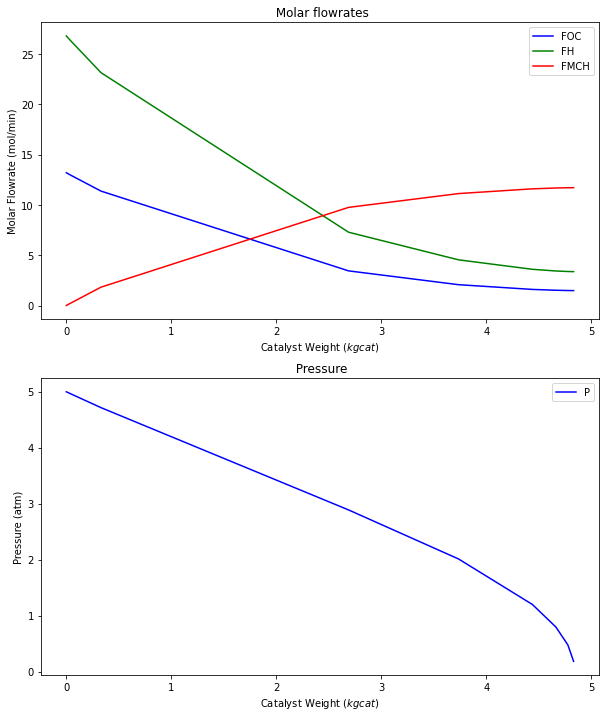

In [48]:
#print plots or graphs

#plot the data
plt.figure(figsize=(10,12))

plt.subplot (2,1,1)
plt.plot(sol.t,sol.y[0],'b',label='FOC')
plt.plot(sol.t,sol.y[1],'g',label='FH')
plt.plot(sol.t,sol.y[2],'r',label='FMCH')

plt.legend()
plt.title(' Molar flowrates')
plt.xlabel('Catalyst Weight ($kgcat$)')
plt.ylabel('Molar Flowrate (mol/min)')

plt.subplot (2,1,2)
plt.plot(sol.t,sol.y[3],'b',label='P')

plt.legend()
plt.title(' Pressure')
plt.xlabel('Catalyst Weight ($kgcat$)')
plt.ylabel('Pressure (atm)')

In [61]:
teval=np.linspace(tspan[0],tspan[1],11)
sol=solve_ivp(ODEfun,tspan,F0,t_eval=teval)
numrows=len(sol.t)
print('Solution ')
print('    W         FOC         FH       FMCH       P        X')
print('  (kgcat)  (mol/min)  (mol/min)  (mol/min)   (atm)  ')
X=np.zeros(numrows)
row=0
for row in range(numrows):
    X[row]=(F0[0]-sol.y[0,row])/F0[0]
    print('{:4.4f} {:10.4f} {:10.4f} {:10.4f} {:10.3f} {:8.3f} '.format(sol.t[row],sol.y[0,row],sol.y[1,row],sol.y[2,row],sol.y[3,row],X[row]))

Solution 
    W         FOC         FH       FMCH       P        X
  (kgcat)  (mol/min)  (mol/min)  (mol/min)   (atm)  
0.0000    13.2000    26.8000     0.0000      5.000    0.000 
0.4830    10.5974    21.5949     2.6026      4.589    0.197 
0.9660     8.4039    17.2078     4.7961      4.198    0.363 
1.4490     6.5907    13.5814     6.6093      3.824    0.501 
1.9320     5.1255    10.6510     8.0745      3.460    0.612 
2.4150     3.9720     8.3440     9.2280      3.097    0.699 
2.8980     3.0898     6.5797    10.1102      2.726    0.766 
3.3810     2.4326     5.2652    10.7674      2.332    0.816 
3.8640     1.9601     4.3203    11.2399      1.888    0.852 
4.3470     1.6430     3.6860    11.5570      1.332    0.876 
4.8300     1.4834     3.3668    11.7166      0.186    0.888 


Text(0, 0.5, 'Pressure (atm)')

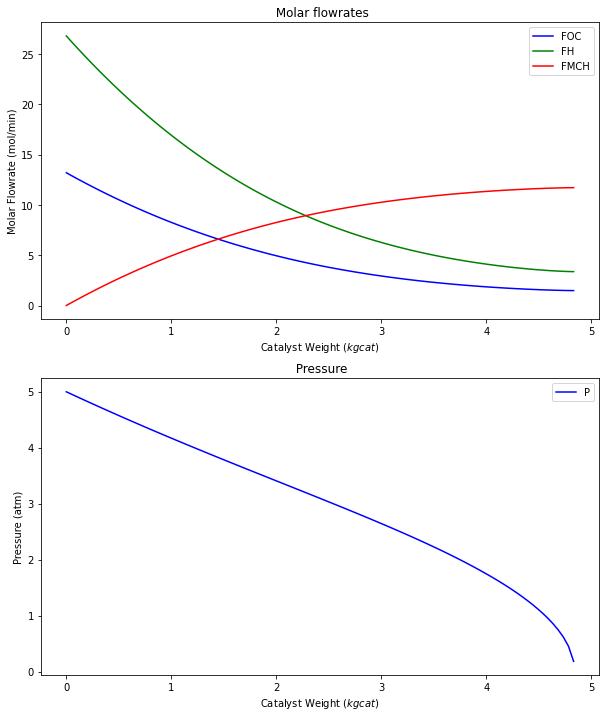

In [63]:
#print smooth plots of the output.  Notice the kink at 4kg in above F vs W plot
teval=np.linspace(tspan[0],tspan[1],101)
sol=solve_ivp(ODEfun,tspan,F0,t_eval=teval)

#print plots or graphs

#plot the data
plt.figure(figsize=(10,12))

plt.subplot (2,1,1)
plt.plot(sol.t,sol.y[0],'b',label='FOC')
plt.plot(sol.t,sol.y[1],'g',label='FH')
plt.plot(sol.t,sol.y[2],'r',label='FMCH')

plt.legend()
plt.title(' Molar flowrates')
plt.xlabel('Catalyst Weight ($kgcat$)')
plt.ylabel('Molar Flowrate (mol/min)')

plt.subplot (2,1,2)
plt.plot(sol.t,sol.y[3],'b',label='P')

plt.legend()
plt.title(' Pressure')
plt.xlabel('Catalyst Weight ($kgcat$)')
plt.ylabel('Pressure (atm)')

In [71]:
#Calculating conversion and outlet pressure

print('FOC0={:4.2f} mol/min  FOC_out={:4.2f} mol/min   Pout={:4.4f} atm'.format(sol.y[0,0],sol.y[0,-1],sol.y[3,-1]))
X=(F0[0]-sol.y[0][-1])/F0[0]

print('X= {:4.4f} P= {:6.4f}atm at W= {:6.4f} kg '.format(X,sol.y[3][-1],sol.t[-1]))

FOC0=13.20 mol/min  FOC_out=1.48 mol/min   Pout=0.1860 atm
X= 0.8876 P= 0.1860atm at W= 4.8300 kg 
